In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl


In [ ]:

## FFCC DATA

ffcc_v1_df = pd.read_excel('Q_FFCC_AUG_AUG_V1.xlsx', sheet_name='raildata_august')
ffcc_v2_df = pd.read_excel('FFCC AGOSTO 2023_V2.xlsx', sheet_name='Exportar Hoja de Trabajo')
ffcc_v2_df['OPERATION_DATE'] = ffcc_v2_df['OPERATION_DATE'].str.replace('?', '')
ffcc_v2_df['OPERATION_DATE'] = pd.to_datetime(ffcc_v2_df['OPERATION_DATE'], format='%Y/%m/%d %H:%M:%S-05:00')
ffcc_v2_df['OPERATION_DATE'] = ffcc_v2_df['OPERATION_DATE'].dt.strftime('%Y-%m-%dT%H:%M:%S-0500')
ffcc_v2_df['OPERATION_DATE'] = pd.to_datetime(ffcc_v2_df['OPERATION_DATE'], format='%Y-%m-%dT%H:%M:%S-0500')

# ffcc_v2_df

In [41]:
# make normalized timsa ffcc query file
ffcc_v2_df['OPERATION_DATE'] = ffcc_v2_df['OPERATION_DATE'].dt.strftime('%Y-%m-%dT%H:%M:%S-0500')
ffcc_v2_df.rename(columns={'ID_CONTAINER': 'ID_CNTR', 'TRAIN_PLATE': 'PLATE', 'TRAIN_CUSTOMER_LINE': 'TRACK'}, inplace=True)

# remove TYPE_CNTR
ffcc_v2_df.drop(['TYPE_CNTR'], axis=1, inplace=True)
# save to excel without index
ffcc_v2_df.to_excel('Q_FFCC_AUG_TIMSA.xlsx', index=False)

In [13]:
# INNER JOIN on ffcc_v1_df and ffcc_v2_df on ffcc_v1_df['Contenedor'] == ffcc_v2_df['ID_CONTAINER']

ffcc_v1_df['Contenedor'] = ffcc_v1_df['Contenedor'].astype(str)
ffcc_v2_df['ID_CONTAINER'] = ffcc_v2_df['ID_CONTAINER'].astype(str)

ffcc_v1_df['Contenedor'] = ffcc_v1_df['Contenedor'].str.strip()
ffcc_v2_df['ID_CONTAINER'] = ffcc_v2_df['ID_CONTAINER'].str.strip()

ffcc_v1_df['Contenedor'] = ffcc_v1_df['Contenedor'].str.replace(' ', '')
ffcc_v2_df['ID_CONTAINER'] = ffcc_v2_df['ID_CONTAINER'].str.replace(' ', '')

# join
ffcc_v1_df = ffcc_v1_df.rename(columns={'Contenedor': 'ID_CONTAINER'})

joined_df = ffcc_v1_df.join(ffcc_v2_df.set_index('ID_CONTAINER'), on='ID_CONTAINER', how='inner')

In [43]:
import_df = ffcc_v2_df[ffcc_v2_df['FLOW'] == 'O']
export_df = ffcc_v2_df[ffcc_v2_df['FLOW'] == 'I']

In [58]:
# remove ? symbol at end of OPERATION_DATE entries
print('Import (Terminal Out) Containers in Aug 2023')
import_df['OPERATION_DATE'].dt.date.value_counts().sort_index()

Import (Terminal Out) Containers in Aug 2023


OPERATION_DATE
2023-08-01    1
2023-08-02    1
2023-08-07    4
2023-08-08    1
2023-08-14    3
2023-08-15    1
2023-08-16    1
2023-08-21    3
2023-08-22    3
2023-08-29    2
2023-08-30    2
2023-08-31    1
Name: count, dtype: int64

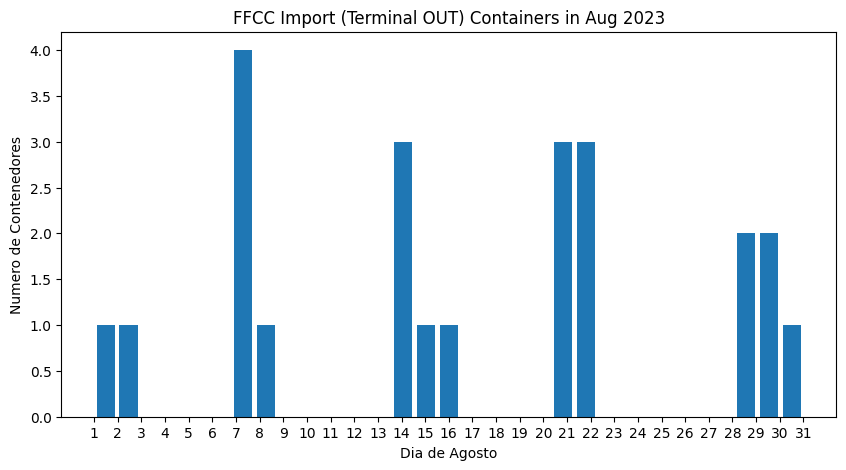

# Import Containers: 23


In [79]:
import_data = import_df['OPERATION_DATE'].dt.day
x = range(1, 32)

# plot in a histogram import_data and use x in xticks
plt.figure(figsize=(10, 5))
plt.hist(import_data, bins=31, rwidth=0.8)
plt.xticks(x)
plt.xlabel('Dia de Agosto')
plt.ylabel('Numero de Contenedores')
plt.title('FFCC Import (Terminal OUT) Containers in Aug 2023')
plt.show()

print(f'# Import Containers: {len(import_df)}')


In [110]:
import_df[import_df['OPERATION_DATE'].dt.day == 31]

,ID_CONTAINER,OPERATION_DATE,TRAIN_PLATE,TRAIN_CUSTOMER_LINE,SIZE_CNTR,TYPE_CNTR,STATUS_CNTR,BLOCK,FLOW
1364,TCKU6109113,2023-08-31 07:12:52,NKCR5056,EMC,40,HC,F,1P,O


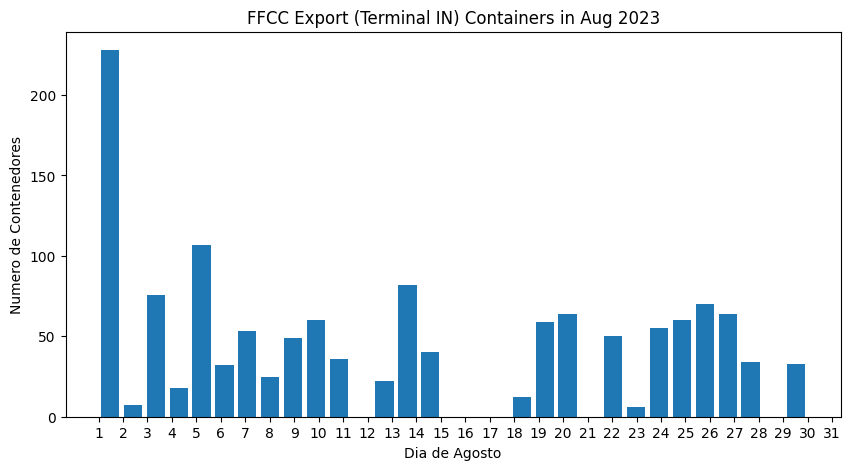

# Export Containers: 1342


In [80]:
export_data = export_df['OPERATION_DATE'].dt.day
x = range(1, 32)

# plot in a histogram import_data and use x in xticks
plt.figure(figsize=(10, 5))
plt.hist(export_data, bins=31, rwidth=0.8)
plt.xticks(x)
plt.xlabel('Dia de Agosto')
plt.ylabel('Numero de Contenedores')
plt.title('FFCC Export (Terminal IN) Containers in Aug 2023')
plt.show()

print(f'# Export Containers: {len(export_df)}')

In [126]:
i = 27
for day in range(i, 32):
    day_df = export_df[export_df['OPERATION_DATE'].dt.day == day]
    f_20 = day_df[(day_df['SIZE_CNTR'] == 20) & (day_df['STATUS_CNTR'] == 'F')]
    f_40 = day_df[(day_df['SIZE_CNTR'] == 40) & (day_df['STATUS_CNTR'] == 'F')]
    e_20 = day_df[(day_df['SIZE_CNTR'] == 20) & (day_df['STATUS_CNTR'] == 'E')]
    e_40 = day_df[(day_df['SIZE_CNTR'] == 40) & (day_df['STATUS_CNTR'] == 'E')]

    print(f'Export Containers on Day {day}')
    print(f'20ft Full: {len(f_20)}')
    print(f'40ft Full: {len(f_40)}')
    print(f'20ft Empty: {len(e_20)}')
    print(f'40ft Empty: {len(e_40)}')

Export Containers on Day 27
20ft Full: 0
40ft Full: 0
20ft Empty: 0
40ft Empty: 64
Export Containers on Day 28
20ft Full: 0
40ft Full: 1
20ft Empty: 10
40ft Empty: 23
Export Containers on Day 29
20ft Full: 0
40ft Full: 0
20ft Empty: 0
40ft Empty: 0
Export Containers on Day 30
20ft Full: 0
40ft Full: 1
20ft Empty: 0
40ft Empty: 32
Export Containers on Day 31
20ft Full: 0
40ft Full: 0
20ft Empty: 0
40ft Empty: 0


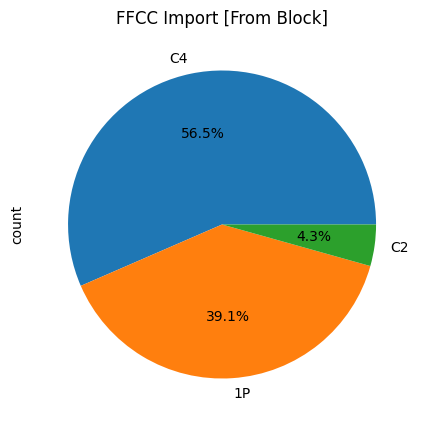

BLOCK
C4    13
1P     9
C2     1
Name: count, dtype: int64

In [96]:
# plot in pie chart import_df['BLOCK'].value_counts()

import_df['BLOCK'].value_counts().plot(kind='pie', figsize=(10, 5), autopct='%1.1f%%', title='FFCC Import [From Block]')
plt.show()
import_df['BLOCK'].value_counts().sort_values(ascending=False)

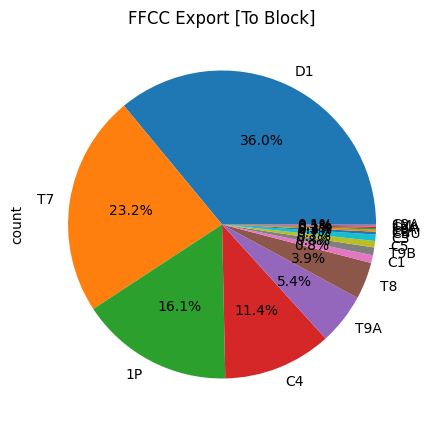

BLOCK
D1     483
T7     312
1P     216
C4     153
T9A     72
T8      52
C1      11
T9B     11
C5       9
C3       9
CBU      4
C2       3
1PA      2
C3A      2
1M       2
C2A      1
Name: count, dtype: int64

In [97]:
export_df['BLOCK'].value_counts().plot(kind='pie', figsize=(10, 5), autopct='%1.1f%%', title='FFCC Export [To Block]')
plt.show()
export_df['BLOCK'].value_counts().sort_values(ascending=False)


In [128]:
# OPERATION_DATE put in string with format '%Y-%m-%dT%H:%M:%S-0500'
ffcc_v2_df['OPERATION_DATE'] = ffcc_v2_df['OPERATION_DATE'].dt.strftime('%Y-%m-%dT%H:%M:%S-0500')
# Export ffcc_v2_df to excel without index

,ID_CONTAINER,OPERATION_DATE,TRAIN_PLATE,TRAIN_CUSTOMER_LINE,SIZE_CNTR,TYPE_CNTR,STATUS_CNTR,BLOCK,FLOW
0,TGHU6822537,2023-08-01T10:58:59-0500,DTTX400533,EMC,40,HC,E,C4,I
1,TGBU6292944,2023-08-01T11:10:36-0500,DTTX400533,EMC,40,HC,E,C4,I
2,EITU1394556,2023-08-01T11:02:15-0500,DTTX400533,EMC,40,HC,E,C4,I
3,CAIU7086651,2023-08-01T11:04:48-0500,DTTX400533,EMC,40,HC,E,C4,I
4,HMCU9110138,2023-08-01T11:00:14-0500,DTTX400533,EMC,40,HC,E,C4,I
...,...,...,...,...,...,...,...,...,...
1360,BMOU1083167,2023-08-29T20:07:53-0500,LRS513811,EMC,20,DC,F,1P,O
1361,FFAU2110340,2023-08-29T19:50:25-0500,FXE5711,EMC,40,HC,F,1P,O
1362,EGHU3880324,2023-08-30T09:30:59-0500,LRS513811,EMC,20,DC,F,1P,O
1363,EITU9001716,2023-08-30T21:22:34-0500,LRS513827,EMC,40,HC,F,1P,O


In [129]:
# Export ffcc_v2_df to excel without index
ffcc_v2_df.to_excel('FFCC AGOSTO 2023_V2_Corregido.xlsx', sheet_name='Exportar Hoja de Trabajo', index=False)

In [34]:
## SPF DATA
spf_df = pd.read_excel('timsa_spf_aug_v2.xlsx', sheet_name='parking_lot')

# PLATE, OPERATION_DATE, BLOCK, STATUS_CNTR, SIZE_CNTR, FLOW, ID_CNTR
# only interesting columns = ['Plate', 'Bloque', 'Teus', 'Full/Empty', 'Contenedor', 'Pickup', 'Hora llegada']
spf_df = spf_df[['Plate', 'Bloque', 'Teus', 'Full/Empty', 'Contenedor', 'Pickup', 'Hora llegada']]
# rename columns
spf_df = spf_df.rename(columns={'Plate': 'PLATE', 'Bloque': 'BLOCK', 'Teus': 'SIZE_CNTR', 'Full/Empty': 'STATUS_CNTR',
                                'Contenedor': 'ID_CNTR', 'Pickup': 'FLOW', 'Hora llegada': 'OPERATION_DATE'})

spf_df['SIZE_CNTR'] = spf_df['SIZE_CNTR'].replace(1, 20)
spf_df['SIZE_CNTR'] = spf_df['SIZE_CNTR'].replace(2, 40)

spf_df['FLOW'] = spf_df['FLOW'].replace(0, 'I')
spf_df['FLOW'] = spf_df['FLOW'].replace(1, 'O')

spf_df

,PLATE,BLOCK,SIZE_CNTR,STATUS_CNTR,ID_CNTR,FLOW,OPERATION_DATE
0,87AR9H,C3,20,F,TCLU7546584,I,2023-08-01 00:02:00
1,87AR9H,C3,20,F,TTNU1111476,I,2023-08-01 00:02:00
2,345EP5,C4,40,F,CXRU1609996,I,2023-08-01 00:07:00
3,345EP5,C4,40,F,SEGU9466241,I,2023-08-01 00:07:00
4,T2088,C5,40,F,YMMU6650762,O,2023-08-01 00:23:00
...,...,...,...,...,...,...,...
13610,30AG2M,C5,40,F,TCKU6485065,I,2023-08-31 22:29:00
13611,86AL3W,C4,40,F,SEGU9945408,I,2023-08-31 22:31:00
13612,90AX3H,C5,40,F,EGHU9172298,I,2023-08-31 22:34:00
13613,12AD9R,T7,40,E,SILU7020075,O,2023-08-31 23:16:00


In [36]:
spf_df['OPERATION_DATE'] = spf_df['OPERATION_DATE'].dt.strftime('%Y-%m-%dT%H:%M:%S-0500')
# Export spf_df to excel without index
spf_df.to_excel('Q_SPF_AUG_TIMSA.xlsx', sheet_name='data', index=False)

In [37]:
spf_df['BLOCK'].unique()

array(['C3', 'C4', 'C5', 'CFS', 'C2', 'T8', 'T7', '1M', 'C1', '1P', 'C6',
       'C3A', '3A', 'CFE', 'T9A', 'C2A', 'CBU', 'C1A', 'YAT', 'C6A',
       'PRE', 'T9B', 'D1', 'SSA', 'R1', 'C4A', 'C1F', '1MA', 'OCU', '1PA',
       'C5A'], dtype=object)

In [18]:
## VESSEL DATA
vessel_df = pd.read_excel('timsa_vessel_aug.xlsx', sheet_name='BUQUE')
# Drop REFERENCIA, VIAJE, CNTR_TYPE, LINEA, LINER, "TUVO REVISION", "MODALIDAD ENTREGA", CNTR_TRANSFER, "SE TRANSFIRIO A", "TRANSFERIDO DE"
vessel_df = vessel_df.drop(columns=['REFERENCIA', 'VIAJE', 'CNTR_TYPE', 'MOVIMIENTO EN PATIO', 'TRAFICO', 'LINEA', 'LINER', 'TUVO REVISION', 'MODALIDAD ENTREGA', 'CNTR_TRANSFER', 'SE TRANSFIRIO A', 'TRANSFERIDO DE'])
vessel_df = vessel_df.rename(columns={'CNTR_ID': 'ID_CNTR', 'CNTR_SIZE': 'SIZE_CNTR', 'CNTR_STATUS': 'STATUS_CNTR'})
# add PIER column with value 7

# in column MOVEE, rename 'CARGA' to 'LOAD' and 'DESCARGA' to 'DSCH'
vessel_df['MOVEE'] = vessel_df['MOVEE'].replace('CARGA', 'LOAD')
vessel_df['MOVEE'] = vessel_df['MOVEE'].replace('DESCARGA', 'DSCH')

berth_by_vessel = {
    'OOCL SEOUL': 7,
    'CSCL MONTEVIDEO': 8,
    'OLIVIA': 8,
    'CHIQUITA VENTURE': 8,
    'EVER FOND': 7,
    'MOLLY SCHULTE': 8,
    'CHIQUITA PROGRESS': 7,
    'EVER LYRIC': 7,
    'SOUTHAMPTON EXPRESS': 7,
    'AS FIORELLA': 7,
    'EVER LAWFUL': 7,
    'EVER LIBRA': 7
}

# assign BERTH column to vessel_df depending on VESSEL_NAME
vessel_df['BERTH'] = vessel_df['VESSEL_NAME'].map(berth_by_vessel)
vessel_df.loc[(vessel_df['OPERATION_DATE'] > '2023-08-20') & (vessel_df['VESSEL_NAME'] == 'CHIQUITA VENTURE'), 'BERTH'] = 7

vessel_df

,VESSEL_NAME,EQUIPMENT,MOVEE,OPERATION_DATE,BLOCK,ID_CNTR,SIZE_CNTR,STATUS_CNTR,BERTH
0,OOCL SEOUL,GO01,DSCH,2023-07-31 17:08:00,C4,CSNU7300442,40,F,7
1,OOCL SEOUL,GO01,DSCH,2023-07-31 17:10:00,C4,CCLU7414977,40,F,7
2,OOCL SEOUL,GO01,DSCH,2023-07-31 17:12:00,C3,CSNU6690860,40,F,7
3,OOCL SEOUL,GO01,DSCH,2023-07-31 17:14:00,C4,FFAU2409937,40,F,7
4,OOCL SEOUL,GO02,DSCH,2023-07-31 17:17:00,C3,EITU1554762,40,F,7
...,...,...,...,...,...,...,...,...,...
21268,EVER LIBRA,GOT9,LOAD,2023-08-31 18:51:00,T9A,WHSU6683791,40,E,7
21269,EVER LIBRA,GOT9,LOAD,2023-08-31 18:52:00,T9A,FBLU0207351,40,E,7
21270,EVER LIBRA,GOT9,LOAD,2023-08-31 18:54:00,T9A,WHSU6706562,40,E,7
21271,EVER LIBRA,GOT9,LOAD,2023-08-31 18:55:00,T9A,WHSU5663851,40,E,7


In [20]:
vessel_df['OPERATION_DATE'] = vessel_df['OPERATION_DATE'].dt.strftime('%Y-%m-%dT%H:%M:%S-0500')
# Export vessel_df to excel without index
vessel_df.to_excel('Q_VESSEL_AUG_TIMSA.xlsx', index=False)

In [38]:
# check if there are any blocks in spf_df that are not in vessel_df
spf_blocks = spf_df['BLOCK'].unique()
vessel_blocks = vessel_df['BLOCK'].unique()

for block in spf_blocks:
    if block not in vessel_blocks:
        print(f'Block {block} not in vessel_df')

["SSA", "R1", "C1F", "0CU"]


Block SSA not in vessel_df
Block R1 not in vessel_df
Block C1F not in vessel_df
Block OCU not in vessel_df


In [ ]:
## YARD CRANES MOVES

In [ ]:
## YARD DENSITY